# Importing necessary Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading the Dataset

In [63]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# 2. Subsetting rows that have India as its location

In [64]:
data = data[data["location"] == "India"]

In [65]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15577,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15578,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15579,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15580,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15581,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 3. Checking the null values

In [66]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

new_tests                          91
total_tests                        85
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_per_case                     80
positive_rate                      80
tests_units                        73
stringency_index                    6
dtype: int64

### a. Dropping the entire column if more than 50% of its values are null

In [67]:
print("Shape of data before dropping:",data.shape)
for i in null_columns:
    if(data[i].isnull().sum()>data.shape[0]/2):
        data[i].drop
print("Shape of data after dropping:",data.shape)

Shape of data before dropping: (225, 36)
Shape of data after dropping: (225, 36)


### b. Finding all the numerical_column, ordinal_column and categorical_column and replacing those values by mean, mode and by mode respectively

In [68]:
cols = data.columns
num_cols = data._get_numeric_data().columns
# list(num_cols)

In [69]:
categorical = list(set(cols) - set(num_cols))
# list(set(cols) - set(num_cols))

In [70]:
numerical_column = ["total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand"]
ordinal_column = [i for i in list(null_columns) if i not in numerical_column]
categorical_column = [i for i in list(null_columns) if i in categorical]

In [71]:
for i in numerical_column:
    temp = data[i]
    temp = temp.fillna(temp.mean(),inplace = True)
    
for i in ordinal_column:
    temp = data[i]
    temp = temp.fillna(temp.mode()[0],inplace = True)
    
for i in categorical_column:
    temp = data[i]
    temp = temp.fillna(temp.mode()[0],inplace = True)

In [72]:
data.isna().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
g

# 4. Univariate Analysis:
### a. Drawing histograms of 10 feature columns

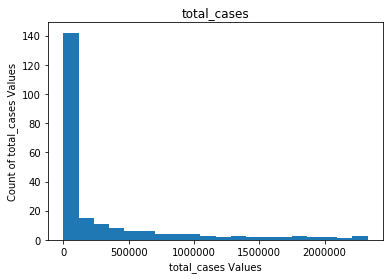

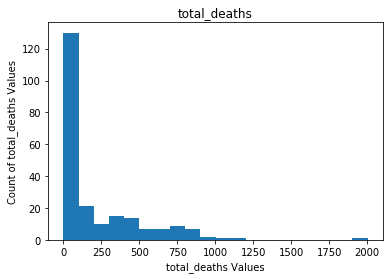

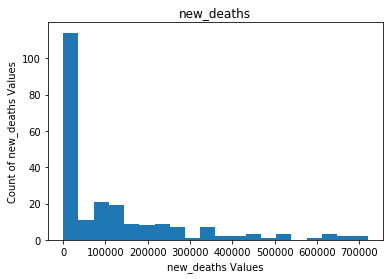

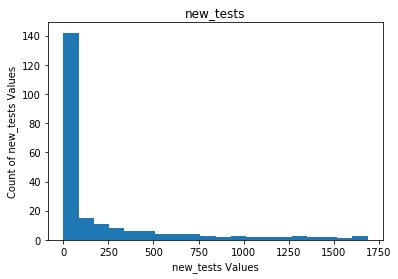

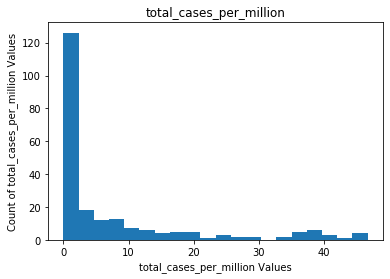

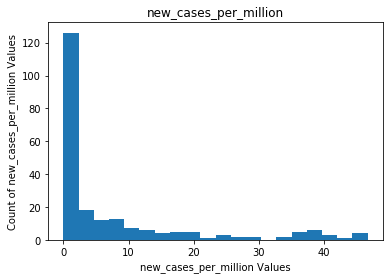

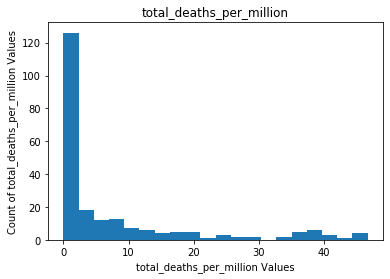

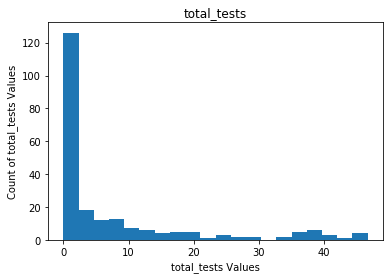

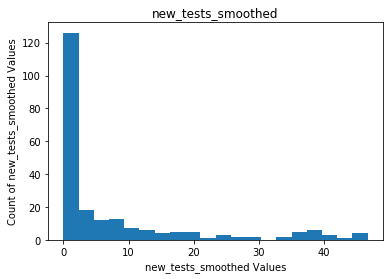

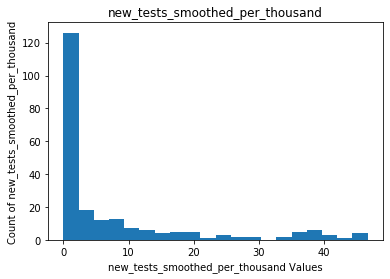

<Figure size 432x288 with 0 Axes>

In [73]:
a=data["total_cases"]
b=data["total_deaths"]
c=data["new_deaths"]
d=data["new_tests"]
e=data["total_cases_per_million"]
f=data["new_cases_per_million"]
g=data["total_deaths_per_million"]
h=data["total_tests"]
i=data["new_tests_smoothed"]
j=data["new_tests_smoothed_per_thousand"]

title="total_cases"
plt.title(title)
plt.hist(a,bins=20)
plt.xlabel("total_cases Values")
plt.ylabel("Count of total_cases Values")
plt.show()
plt.clf()

title="total_deaths"
plt.title(title)
plt.hist(c,bins=20)
plt.xlabel("total_deaths Values")
plt.ylabel("Count of total_deaths Values")
plt.show()
plt.clf()

title="new_deaths"
plt.title(title)
plt.hist(d,bins=20)
plt.xlabel("new_deaths Values")
plt.ylabel("Count of new_deaths Values")
plt.show()
plt.clf()

title="new_tests"
plt.title(title)
plt.hist(e,bins=20)
plt.xlabel("new_tests Values")
plt.ylabel("Count of new_tests Values")
plt.show()
plt.clf()

title="total_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_cases_per_million Values")
plt.ylabel("Count of total_cases_per_million Values")
plt.show()
plt.clf()

title="new_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_cases_per_million Values")
plt.ylabel("Count of new_cases_per_million Values")
plt.show()
plt.clf()

title="total_deaths_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_deaths_per_million Values")
plt.ylabel("Count of total_deaths_per_million Values")
plt.show()
plt.clf()

title="total_tests"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_tests Values")
plt.ylabel("Count of total_tests Values")
plt.show()
plt.clf()

title="new_tests_smoothed"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_tests_smoothed Values")
plt.ylabel("Count of new_tests_smoothed Values")
plt.show()
plt.clf()

title="new_tests_smoothed_per_thousand"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_tests_smoothed_per_thousand Values")
plt.ylabel("Count of new_tests_smoothed_per_thousand")
plt.show()
plt.clf()

### b. Finding mean, median and mode of each column

In [74]:
data.mean()

total_cases                        3.098122e+05
new_cases                          1.035395e+04
total_deaths                       7.603978e+03
new_deaths                         2.048489e+02
total_cases_per_million            2.245008e+02
new_cases_per_million              7.502831e+00
total_deaths_per_million           5.510116e+00
new_deaths_per_million             1.484311e-01
new_tests                          1.118278e+05
total_tests                        4.035084e+06
total_tests_per_thousand           4.696386e+00
new_tests_per_thousand             1.360075e-01
new_tests_smoothed                 1.043423e+05
new_tests_smoothed_per_thousand    1.168690e-01
tests_per_case                     1.502540e+01
positive_rate                      5.833333e-02
stringency_index                   5.697627e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

In [75]:
data.median()

total_cases                        1.998400e+04
new_cases                          1.396000e+03
total_deaths                       6.400000e+02
new_deaths                         4.300000e+01
total_cases_per_million            1.448100e+01
new_cases_per_million              1.012000e+00
total_deaths_per_million           4.640000e-01
new_deaths_per_million             3.100000e-02
new_tests                          2.970600e+04
total_tests                        4.015860e+05
total_tests_per_thousand           4.696386e+00
new_tests_per_thousand             1.360075e-01
new_tests_smoothed                 2.952400e+04
new_tests_smoothed_per_thousand    1.168690e-01
tests_per_case                     1.049700e+01
positive_rate                      4.300000e-02
stringency_index                   7.639000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

In [76]:
data.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,NaN,NaN,NaN,2020-08-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,2020-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,2020-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Bivariate Analysis:
### a. Drawing scatter plots of target column versus 10 features

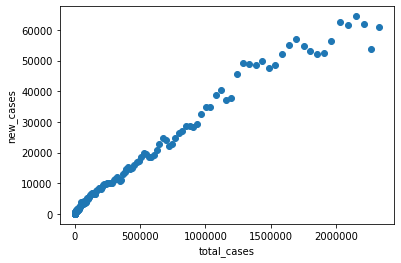

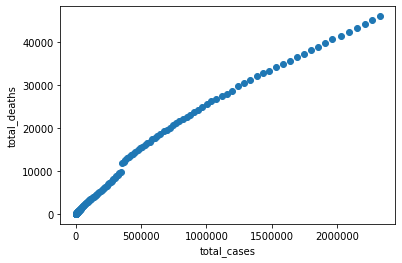

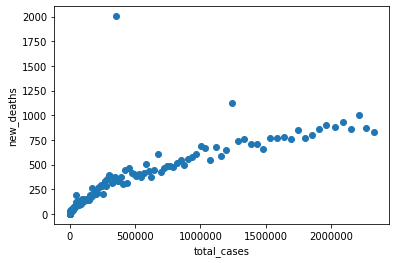

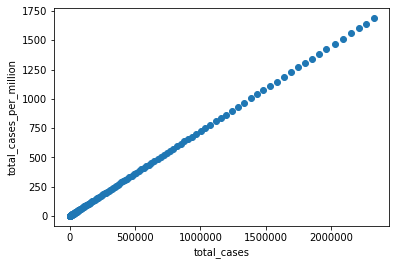

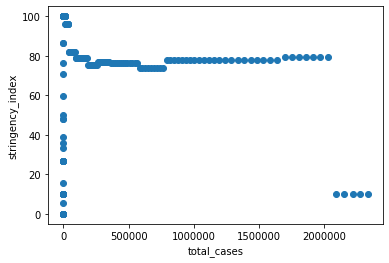

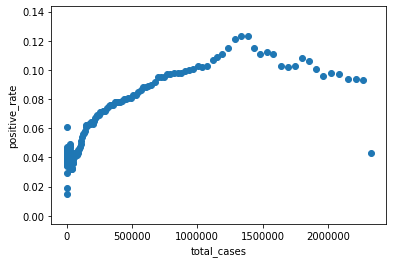

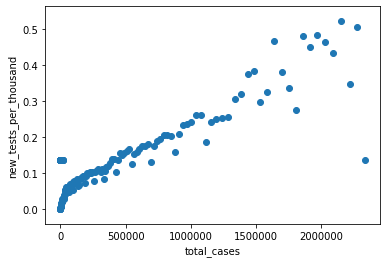

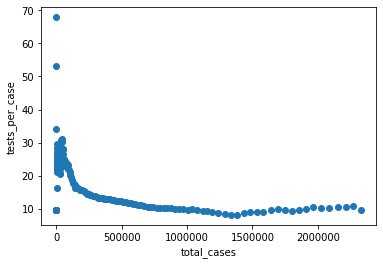

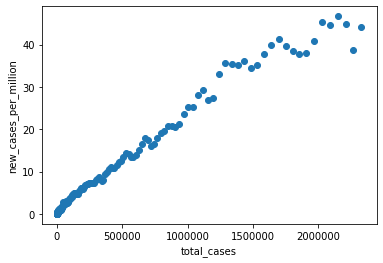

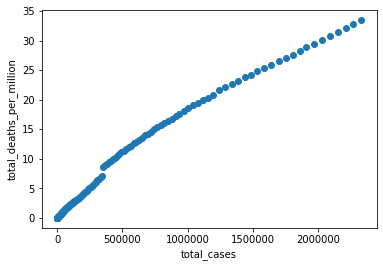

<Figure size 432x288 with 0 Axes>

In [83]:
plt.scatter(data['total_cases'],data['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.scatter(data['total_cases'],data['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.scatter(data['total_cases'],data['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.scatter(data['total_cases'],data['total_cases_per_million'])
plt.xlabel('total_cases')
plt.ylabel('total_cases_per_million')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['stringency_index'])
plt.xlabel('total_cases')
plt.ylabel('stringency_index')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['positive_rate'])
plt.xlabel('total_cases')
plt.ylabel('positive_rate')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['tests_per_case'])
plt.xlabel('total_cases')
plt.ylabel('tests_per_case')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['new_cases_per_million'])
plt.xlabel('total_cases')
plt.ylabel('new_cases_per_million')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['total_deaths_per_million'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths_per_million')
plt.show()
plt.clf()

### b. Drawing line plots of target column versus 10 features

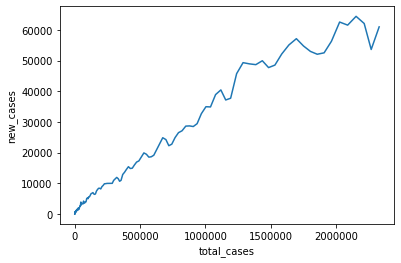

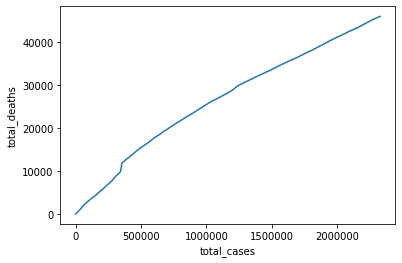

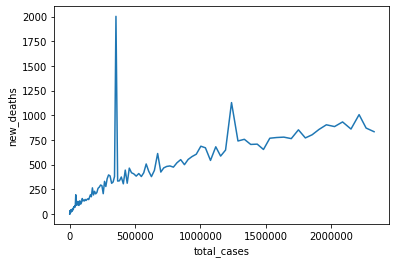

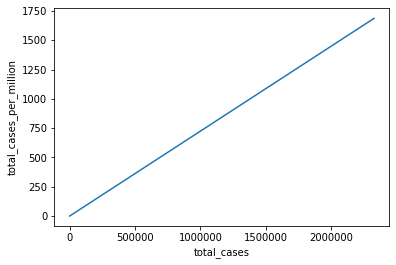

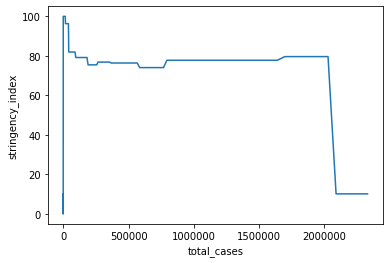

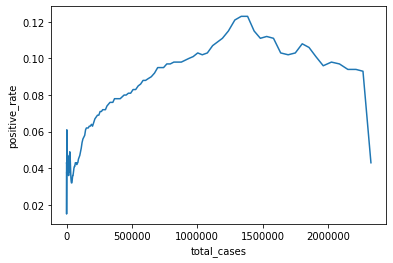

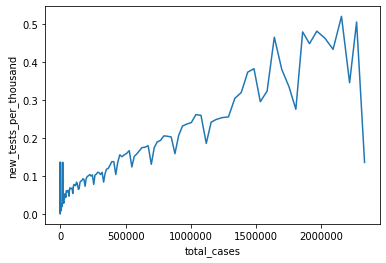

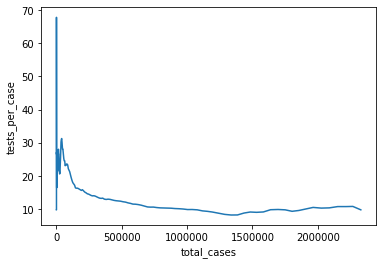

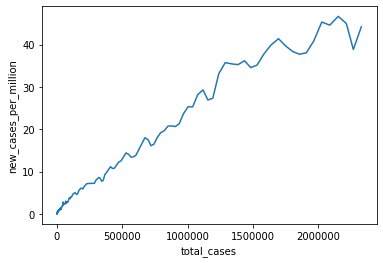

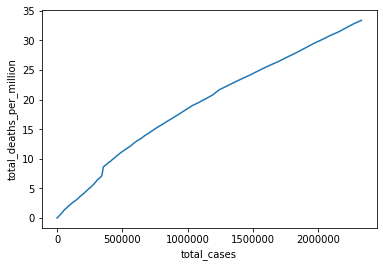

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(data['total_cases'],data['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.plot(data['total_cases'],data['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.plot(data['total_cases'],data['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.plot(data['total_cases'],data['total_cases_per_million'])
plt.xlabel('total_cases')
plt.ylabel('total_cases_per_million')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['stringency_index'])
plt.xlabel('total_cases')
plt.ylabel('stringency_index')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['positive_rate'])
plt.xlabel('total_cases')
plt.ylabel('positive_rate')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['tests_per_case'])
plt.xlabel('total_cases')
plt.ylabel('tests_per_case')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['new_cases_per_million'])
plt.xlabel('total_cases')
plt.ylabel('new_cases_per_million')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['total_deaths_per_million'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths_per_million')
plt.show()
plt.clf()

# 6. Converting the date column to ordinal

In [85]:
import datetime as dt

In [86]:
data["date"]=pd.to_datetime(data["date"])
data["date"]=data["date"].map(dt.datetime.toordinal)

In [87]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15577,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15578,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15579,IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15580,IND,Asia,India,737427,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15581,IND,Asia,India,737428,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 7. Dropping useless categorical columns, and converting useful categorical to numerical by LabelEncoder

In [88]:
data = data.drop(['iso_code','continent','location','tests_units'],axis = 1)

In [89]:
data.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15577,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15578,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15579,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15580,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15581,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 8. Selecting the “total_cases” column as the target variable

In [90]:
target = data['total_cases'].values

# 9. Selecting the other columns as the features

In [91]:
X = data.drop(['total_cases'],axis = 1).values

# 10. Performing the train-test split on the dataset

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size = 0.2,random_state = 42)

# 11. Modelling:
### a. Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(X_train,y_train)

LinearRegression()

### b. Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfr = RandomForestRegressor()

In [99]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

# 12. Getting the accuracy of each model

In [100]:
lr.score(X_test,y_test)*100

99.9999999999511

In [101]:
rfr.score(X_test,y_test)*100

99.91864873183462

# 13. Predicting the total cases for a new given date

In [102]:
new_data = pd.read_csv("test_data.csv")

In [103]:
new_data

,iso_code,continent,location,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2020-08-12,64399.0,43379.0,861.0,1560.147,46.666,31.434,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,IND,Asia,India,2020-08-13,62064.0,44386.0,1007.0,1605.121,44.974,32.164,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [104]:
new_data = new_data.drop(['iso_code','continent','location','tests_units'],axis = 1)

In [105]:
new_data

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,2020-08-12,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,719364.0,24106535.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,2020-08-13,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,477023.0,24583558.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [106]:
new_data["date"]=pd.to_datetime(new_data["date"])
new_data["date"]=new_data["date"].map(dt.datetime.toordinal)

In [107]:
new_data

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,737649,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,719364.0,24106535.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,737650,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,477023.0,24583558.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [108]:
lr.predict(new_data)

array([2153009.94257756, 2215074.04342782])

In [109]:
rfr.predict(new_data)

array([2144278.  , 2175564.24])